<h1>Machine Learning Project 1 - PLA</h1>
<p>Joshua John and Liora Wachsstock</p>

We generated points using the random.randint() python library, which has a random uniform discrete distribution. We assigned a positive value to the point if it was above the y = x line, and a negative value if it was below it. If the data was to be non-linearly separable, then around 10% of the time we switched the point's value.

Special things we did: We used the pocket algorithm in our PLA function. This means we kept track of the solution which has the least number of misclassified points, and at the end of the specified number of passes, we returned the best line that the alogrithm found so far.

<h2> Useful Functions

<h4>Generate Data</h4>

In [1]:
import random
import time

random.seed(time.time())

def generate_data(size, linearly_separable=True, min_dist_btwn_points=0):
    data = [[0 for x in range(2)] for y in range(size)] 

    num_pos, num_neg = 0, 0
    
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)
        
        # Create optional distance between classes
        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(num_pos >= (size / 2) and data[i][0] < data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(num_neg >= (size / 2) and data[i][0] >= data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] < data[i][1]):
            data[i].append(1)
#             data[i][1] += 10
            num_pos += 1
        else:
            data[i].append(-1)
#             data[i][1] -= 10
            num_neg += 1

        # Create non-linearly separable data by switching up the value 10% of the time
        # as long as a class is not full
        if (not linearly_separable and random.randint(1,10) % 10 == 0 and num_pos < (size / 2) and num_neg < (size / 2)):
            data[i][2] *= -1
            num_pos = num_pos + (1 if data[i][2] == 1 else -1)
            num_neg = num_neg + (1 if data[i][2] == -1 else -1)
            
    return data

<h4>Get the number of misclassifed points</h4>

In [2]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    signs = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if signs[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

<h4>loss function</h4>

In [3]:
import numpy as np
def get_loss(W, x, y, C):
    return 1/2 * np.sum(W**2) + C * np.sum([np.max([0, 1 - y[i] * (np.dot(W,x[i]))]) for i in range(len(x))])

def lossGradient(W, x, y, C):
    lossGrad = np.zeros_like(W)
    distance = np.max([0, 1 - y * (np.dot(W,x))])
    if distance == 0:
        lossGrad = W
    else:
        lossGrad = W - np.multiply(np.multiply(x,y), C)
    return lossGrad

def svm_sgd(X, Y, W, N_steps, lr, C):
    best_W = W
    low_loss = -1
    loss_over_time = []
    for step in range(N_steps):
        point = np.random.randint(len(X))
        W = W - lr * lossGradient(W, X[point], Y[point], C)
        loss = get_loss(W,X,Y,C)
        loss_over_time.append(loss)
        if loss < low_loss or low_loss < 0:
            low_loss = loss
            best_W = W
        if (step + 1) % 10 == 0:
            print(f'Current Loss {loss} Step {step}')
        if np.linalg.norm(loss) < 0.1:
            break
            
    return [W, 100, N_steps, loss]

# Example loss
w = np.array([1,2,2]) # hyperplance
x = np.array([[1,2,2], [2,4,4], [9.5, 5, 6]]) # points to classify
y = np.array([-1, 1, -1]) # labels
c = 0.5 # the smaller this value, the larger will be the margin of the SVM model
print(f'Loss {get_loss(w, x, y, c)}')


Loss 25.75


<h4>Order Data Function</h4>

In [4]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

<h4>Separate Data</h4>

In [5]:
def sep_data(data):
    #separate the points from values for sake of pla
    values, points = [],[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
    return [points, values]

<h4>Plot and Print Data</h4>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def accuracy(weights, data):
    points, values = sep_data(data)
    return (float(num_missclassified_points(weights, points, values)) / len(data)) * 100

def line_string(weights):
    return 'y = ('+ str(-weights[0]) + ' + ' + str(-weights[1]) + 'x)/' + str(weights[2])

def print_stats(train_ls, test_ls, weights, lr, final_weights, C, total_updates, iterations, train_accuracy, test_accuracy):
    print('1. We generated the points using the python library random.randint() for both x and y coordinates,')
    print('   which has a random uniform distribution. We then assigned a value based on the points position relative')
    print('   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.')
    print('    (https://docs.python.org/3/library/random.html)')
    print('2. Linearly separable training data :', train_ls)
    print('3. Linearly separable test data:', test_ls)
    print('4. Initial learning weights:', weights, ', learing rate:', lr, ', and C constant:', C)
    print('5.', line_string(final_weights))
    print('6. the margin width is:', 2 / np.sqrt(sum(w**2)))
    print('6. Final missclassification error on training data: ' + str(train_accuracy) + '%')
    print('   Final missclassification error on test data: '+ str(test_accuracy) + '%')
    print('8. Total times the weights were updated:', total_updates)
    print('9. Total iterations:', iterations)
    

def print_conclusions(base_case, case_I, case_II, case_III):
    print("Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.")
    print("The resulting line was", line_string(base_case))
    print('')
    print("I. w = [1,2,3], step_size = 1, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_I))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("II. w = [0,0,0], step_size = 2, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_II))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):") 
    print("   Resulting line:", line_string(case_III))
    print("   Compared to base case result:", line_string(base_case))
    

def plot_data(data, graph_title, weights=[]):
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    x = np.array(range(100))
    y = ((-1*weights[0]) - weights[1]*x) / weights[2]
    plt.plot(x, y)
    y1 = (((-1*weights[0]) - weights[1]*x + 1) / weights[2])
    plt.plot(x, y1)
    y2 = (((-1*weights[0]) - weights[1]*x - 1) / weights[2])
    plt.plot(x, y2) 

<h3><u> Generate Test Data:</u></h3>

In [7]:
test_data = generate_data(30, linearly_separable=False)
test_points, test_values = sep_data(test_data)

<h2><u>Linearly Separable Data Set</u></h2>

<h3>Generate Training Data:

In [8]:
tr_data_ls = generate_data(50,True,10)

#separate for sake of PLA
tr_points, tr_values = sep_data(tr_data_ls)

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

Current Loss 12.901306116051227 Step 9
Current Loss 5.333741974728375 Step 19
Current Loss 2.3370637796649496 Step 29
Current Loss 4.012305967777205 Step 39
Current Loss 1.7937327602198392 Step 49
Current Loss 1.6494608752651883 Step 59
Current Loss 1.403280737416227 Step 69
Current Loss 3.334036807798302 Step 79
Current Loss 1.3565547017490303 Step 89
Current Loss 0.8847117697118121 Step 99
Current Loss 1.7572935088500872 Step 109
Current Loss 1.088024121079563 Step 119
Current Loss 1.0921903812652025 Step 129
Current Loss 1.0152757904512917 Step 139
Current Loss 1.019234446391946 Step 149
Current Loss 0.7268890767608117 Step 159
Current Loss 0.7304247133883612 Step 169
Current Loss 0.7339533146285565 Step 179
Current Loss 0.7374748944216365 Step 189
Current Loss 0.7409894666804602 Step 199
Current Loss 1.0745240378700252 Step 209
Current Loss 0.6941531917781415 Step 219
Current Loss 1.4503071677925146 Step 229
Current Loss 1.456669503193922 Step 239
Current Loss 1.4459866152461618 St

NameError: name 'loss_array' is not defined

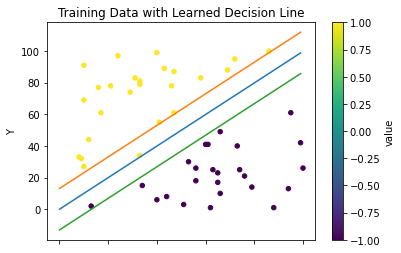

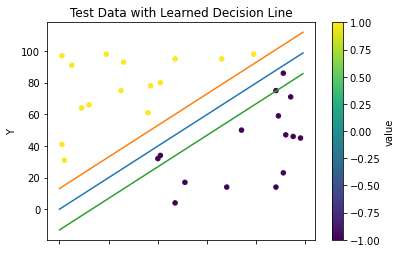

In [9]:
#Variables
steps = 400
learning_rate = 0.0002
C = 0.5;
w = [0,0,0]

#Run PLA on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points, tr_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line', w)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

#save result
base_case = w

y = loss_array
x = np.array(range(len(y)))
plt.plot(x, y)

In [ ]:

# load iris dataset
import sklearn as sklearn
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

data = sklearn.datasets.load_iris()
X, y = make_classification(n_samples = 2000)
y = pd.Series(y).map({0: -1, 1: 1}).values # transform labels for SVM format

# split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 44)

a = np.array([1,1,1])
print(a)
print(np.multiply(a, 8))